# SUMMARIZATION TECHNIQUES

## USE OF DATASETS WITH GROUND TRUTH FOR COMPARING THE DIFFERENT SUMMARIZATION TECHNIQUES

### FIRST DATASET - QMSUM WITH DISCUSSION ABOUT PRODUCTS

In [1]:
import json
import pandas as pd

# Load the JSON data
with open('datasets/QMSum/data/Product/train/ES2002c.json', 'r') as f:
    data = json.load(f)


print(data.keys())
df_topics = pd.DataFrame(data['topic_list'])
df_query_list = pd.DataFrame(data['general_query_list'])
df_comments = pd.DataFrame(data['meeting_transcripts'])
print('--------------------------------------------------------------------------------------------------------------------')
print(df_comments)
print('--------------------------------------------------------------------------------------------------------------------')
print(df_topics)

dict_keys(['topic_list', 'general_query_list', 'specific_query_list', 'meeting_transcripts'])
--------------------------------------------------------------------------------------------------------------------
                 speaker                                            content
0    Industrial Designer  'S to do now is to decide how to fulfil what y...
1              Marketing                                             Yeah .
2    Industrial Designer                      so in that sense {disfmarker}
3        Project Manager                                             Okay .
4              Marketing                                      Yeah , sure .
..                   ...                                                ...
635  Industrial Designer                                    Play-doh time .
636      Project Manager                      Yeah quite jealous actually .
637  Industrial Designer  You got to choose first . {vocalsound} No , we...
638            Marketing     

                 speaker                                        content
92       Project Manager  Um thank you for that . Uh Craig do you wanna
93             Marketing                                          Yep .
94       Project Manager                        uh plug yours in then ?
95        User Interface                                Is it working ?
96       Project Manager                  {vocalsound} Mm . Not quite .
..                   ...                                            ...
311            Marketing                                       Mm-hmm .
312      Project Manager                                          Right
313  Industrial Designer                                  glowingness .
314      Project Manager                      okay um well {vocalsound}
315            Marketing                                 Okay , great .

[224 rows x 2 columns]


C:\1. Python\LLM_mods_Topic_Modelling\utils\plot_words_distribution.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df[column_to_plot].apply(lambda x: no_of_words(x) if isinstance(x, str) else 0)


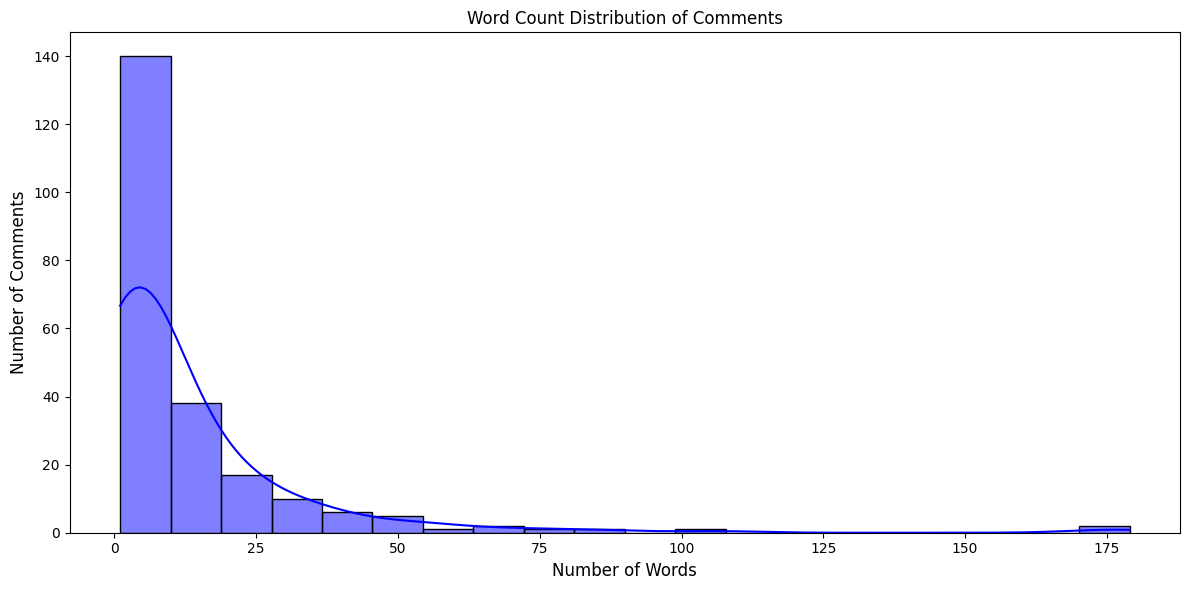

In [2]:
from utils.plot_words_distribution import plot_distribution_of_words

text_col = 'content'

# take the topic No2:  Presentation on the component design
df_sum_3 = df_comments[92:316]
print(df_sum_3)

# plot the distribution of words
plot_distribution_of_words(df_sum_3, text_col)

In [3]:
from utils.load_prompts import load_chosen_prompt
from summarization_methods.divide_comments_and_summarize import divide_comments_by_time, create_summary_for_groups_of_comments
from utils.load_pretrained_spacy_model import load_pretrained_model
from sklearn.model_selection import train_test_split


# load the final dataset and the language
df_sum_3, _ = load_pretrained_model(df=df_sum_3, text_col=text_col)

# load the prompt template
prompt_template = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The language of the dataset is: en
The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


C:\1. Python\LLM_mods_Topic_Modelling\utils\load_pretrained_spacy_model.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language'] = df[text_col].apply(detect_language)


### 1ST SUMMARIZATION TECHNIQUE: SEPARATE COMMENTS RANDOMLY INTO GROUPS

We are going to implement a simple technique by grouping the comments/reviews into groups randomly, create a summary for each group of comments and finally a final summarization based on the summaries of group of comments

In [5]:
from summarization_methods.divide_comments_and_summarize import divide_comments_by_time, create_summary_for_groups_of_comments

language = 'English'
topic = df_topics.iloc[2].topic

# divide the comments into groups
groups_2 = divide_comments_by_time(df_sum_3, text_column='content')

#create the summaries
summaries_2 = create_summary_for_groups_of_comments(groups=groups_2, prompt=prompt_template, gpt_model='gpt-4o', language=language, topic=topic)

Comments do not contain timestamp. Continue the group by shuffle them.


  7%|█████████▌                                                                                                                                     | 1/15 [00:02<00:33,  2.41s/it]

### Summary of Comments on Presentation on Component Design

1. **Power Consumption and Complexity**: One of the key insights from the comments is the consideration of power consumption, which is expected to remain approximately the same. However, there is a significant concern about the complexity involved in the component design.

2. **Design and Materials**: The discussion also touched on the look of the case, highlighting that it could be either flat or curved. Various materials can be used, although a combination of materials is not feasible.

3. **Critical Factors**: Three critical factors impacting the design were identified: cost, complexity, and size. These factors need to be thoroughly examined when considering the available component options.

4. **Material Restrictions**: There are specific restrictions for the materials. For instance, rubber imposes limitations on the type of power source that can be used, while plastic does not have such restrictions.

5. **Communication 

 13%|███████████████████                                                                                                                            | 2/15 [00:05<00:34,  2.63s/it]

### Summary of Comments on Presentation on Component Design

1. **Component Positioning**: There is a notable comment about the specific positioning of components, suggesting that the placement of the cable should have been in the middle of the table to optimize functionality and aesthetics.

2. **Power Sources and Mechanism**: The concept of using alternative power sources, such as a bouncing ball, to generate energy and power a light was proposed. This introduces an innovative approach to thinking about energy efficiency and potential design creativity.

3. **Color Scheme**: The use of the color yellow is a recurring theme in various contexts, including the website design and Play-Doh, drawing attention to the visual branding and design elements. This repeated mention underlines the importance of the color scheme in the overall design narrative.

4. **Feature Integration**: There is an emphasis on the seamless integration of additional features. Specifically, any extra functionalitie

 20%|████████████████████████████▌                                                                                                                  | 3/15 [00:08<00:33,  2.79s/it]

### Summary of Comments on Presentation on Component Design

1. **Ergonomics and User Comfort**: A significant insight revolves around the need for components to be comfortable to hold, emphasizing a preference for a small and slim design. This highlights the importance of ergonomics in component design.

2. **Research and Comparison**: The discussion included a review of existing remote controls on the homepage, incorporating their features and design elements. This suggests a practice of comparative research to refine the design of new components.

3. **Size and Button Placement**: Detailed suggestions were made about the size of the control, the shape, and the button placement. These elements are crucial for the functionality and user experience of the device.

4. **Logical Complexity and Cost**: Comments addressed the complexity of logic chips within the design, noting that the number of functions impacts both complexity and cost. Additionally, it was mentioned that logic chips gen

 27%|██████████████████████████████████████▏                                                                                                        | 4/15 [00:10<00:29,  2.65s/it]

### Summary of Comments on Presentation on Component Design

1. **New Component Features**: The idea of implementing a scroll wheel, like those found in computer mice, was proposed to enhance user interaction with the component. This innovation suggests a focus on improving the user interface and ease of operation.

2. **Component Modification or Redesign**: The comments indicate that the option to either modify existing components or start from scratch should be considered based on specific needs. This flexibility allows tailoring the design to better meet user requirements.

3. **Battery Quality**: Emphasis was placed on integrating a high-quality battery to ensure reliable performance. Battery life and efficiency are highlighted as key factors in the overall user experience.

4. **Material Integration**: There was a mention of potentially combining materials such as rubber to incorporate gimmicky features. This comment points to a creative approach in material selection to include u

 33%|███████████████████████████████████████████████▋                                                                                               | 5/15 [00:13<00:25,  2.59s/it]

### Summary of Comments on Presentation on Component Design

1. **Voice Activation and Alternatives**: There is a discussion about integrating voice activation in the design but also ensuring an alternative button option is available. This alternative button could be hidden in an open section for accessibility issues, such as when the user's voice is compromised due to a cold.

2. **Aesthetics and Form Factor**: Several comments highlight the importance of avoiding a "big square block" aesthetic, suggesting a preference for more visually appealing designs.

3. **Power Options**: Multiple power sources were discussed. The standard battery is considered practical, whereas a wind-up crank option is viewed as more of a gimmick rather than a functional power solution.

4. **Production Efficiency**: Emphasis was placed on reducing the number of components to lower costs, increase profits, and accelerate the development timeline. Simplifying components can also reduce the complexity of design

 40%|█████████████████████████████████████████████████████████▏                                                                                     | 6/15 [00:16<00:24,  2.76s/it]

### Summary of Comments on Presentation on Component Design

1. **Standard Features**: Some comments acknowledge that the features discussed are considered quite standard within the industry.

2. **Innovative Energy Solutions**: The concept of using stress balls that light up upon being bounced was mentioned, highlighting creative and playful approaches to energy generation.

3. **Slogan and Branding Issues**: There was uncertainty about where the slogan should be placed and what the specific slogan should be, indicating a need for clearer branding.

4. **Design Constraints**: It was mentioned that curved designs are not feasible on wooden materials, pointing to material restrictions in design.

5. **Button Design and Color Scheme**: Confusion in button design, such as incorrectly labeled volume buttons, was highlighted. Additionally, the need for a bright, easily identifiable color scheme was suggested to enhance visibility.

6. **Current Market Analysis**: Research revealed that many

 47%|██████████████████████████████████████████████████████████████████▋                                                                            | 7/15 [00:18<00:21,  2.69s/it]

### Summary of Comments on Presentation on Component Design

1. **User Interface and Logic Complexity**: It was noted that the incorporation of features such as LCD panels and scroll wheels increases the complexity of logic required for the component. This reflects the need to balance advanced functionality with manageable design complexity.

2. **Material Compatibility**: Several comments discussed different material options, indicating that while plastic and rubber are suitable, materials like wood and titanium may pose challenges, particularly when integrating features like solar panels.

3. **Button Illumination**: There is a notable insight on the importance of illuminated buttons for usability in dark environments. This highlights the necessity of designing components that are user-friendly, even in low-light conditions.

4. **Practicality of Design Elements**: The practicality of features such as shake-to-activate functions was questioned, suggesting a preference for simpler and

 53%|████████████████████████████████████████████████████████████████████████████▎                                                                  | 8/15 [00:21<00:18,  2.65s/it]

### Summary of Comments on Presentation on Component Design

1. **Kinetic Energy Charging**: The idea of utilizing kinetic energy, similar to automatic watches, was suggested, where the device charges through motion. This points to innovative, user-friendly, and sustainable energy solutions.

2. **Battery Quality**: Emphasis on integrating a high-quality battery was reiterated, to prevent frequent charging. Ensuring reliable and long-lasting power remains a crucial focus.

3. **Ambient Lighting for Usability**: Comparisons were made to phone backlighting and other suggestions included touch or motion-activated lighting. This underlines the importance of visibility and usability in low-light environments.

4. **Design Factors (Small and Slim)**: Desire for a comfortable, small yet not overly miniature design to ensure ease of use without compromising functionality. This shows the balance between ergonomics and practical usability.

5. **Component-Based Design**: Reference was made to in

 60%|█████████████████████████████████████████████████████████████████████████████████████▊                                                         | 9/15 [00:23<00:15,  2.52s/it]

### Summary of Comments on Presentation on Component Design

1. **Material Grouping**: It was suggested to group materials like plastic and rubber together, as well as wood and titanium. This denotes a significant insight into material compatibility and potential design simplifications.

2. **Power Source Diversity**: There is an understanding that even with alternative power sources, a battery remains necessary. This reinforces the need for versatile and dependable power solutions within the component design.

3. **Aesthetic Decisions**: Comments indicated that the choice of power sources affects the overall look and feel of the design, highlighting the impact of functional elements on aesthetic decisions.

4. **Restrictive Mixing**: Mixing certain features or materials may not be advisable. This reflects the consideration of practical constraints in the design process.

Overall, these comments emphasize the importance of thoughtful material grouping, the necessity of versatile power 

 67%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 10/15 [00:25<00:12,  2.41s/it]

### Summary of Comments on Presentation on Component Design

1. **Material and Combination Restrictions**: There is a consensus that certain materials, specifically titanium, may not be practical for combination use. This illustrates an awareness of material compatibility and practical design limitations.

2. **Kinetic Activation Issues**: The reliability of kinetic activation methods like shaking or knocking is questioned, indicating a preference for more reliable and straightforward activation mechanisms.

3. **Energy Management in Technology Usage**: A point was raised comparing the frequency of charging required for different devices, such as phones, which need charging only once a week. This highlights the ongoing concern for efficient and long-lasting power management within components.

4. **Process Clarity**: There is an emphasis on understanding the involved processes and workflow for the design, stressing the importance of clear communication and collaborative understanding a

 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 11/15 [00:28<00:10,  2.55s/it]

### Summary of Comments on Presentation on Component Design

1. **Corporate Color Scheme and Flexibility**: There were questions regarding the existence and flexibility of a corporate color scheme. Participants wanted to know if alternate colors could be used or if they had to stick strictly to the corporate colors.

2. **Button Design Consistency**: Several comments highlighted issues with the inconsistent color schemes employed by the controls, particularly pointing out that the stand-by button should always be red for easy identification. Participants voiced the need for large, comfortable buttons that are easy to press, opposing the tiny buttons often found on mobile phones.

3. **Action Confirmation**: It was suggested that buttons should confirm any action taken by the user. This implies the importance of feedback to ensure the user is aware their input has been registered.

4. **Clarification on Technology**: There were calls for more clarity on technological aspects such as the

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 12/15 [00:30<00:06,  2.33s/it]

### Summary of Comments on Presentation on Component Design

1. **Battery Power Considerations**: There was discussion on whether the battery can adequately power the device, emphasizing the necessity for efficient and realistic battery solutions to support all functions.

2. **Material Restrictions**: Continued mention of restrictions concerning using materials such as rubber and titanium, indicating ongoing concerns about material compatibility and practical use.

3. **Alternate Power Sources**: A comment referenced the use of solar-powered cells, suggesting interest in sustainable and alternative power sources.

Overall, these comments underline the importance of ensuring sufficient battery power, considering practical material restrictions, and exploring alternative power sources to enhance design efficiency.


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 13/15 [00:32<00:04,  2.40s/it]

### Summary of Comments on Presentation on Component Design

1. **Material Restrictions on Titanium**: It was pointed out that a titanium case cannot be curved and must be square. This indicates the ongoing concern for material compatibility and its practical limitations when designing components.

2. **Marketing vs Technology**: There was a discussion distinguishing between marketing gimmicks and genuine technological innovations. This highlights the importance of ensuring technological features are not just superficially appealing but provide real value.

3. **Battery and Power Solutions**: Comments reiterated the need for efficient battery solutions, with suggestions that a battery alone might not be sufficient and additional power sources could be necessary. This emphasizes the focus on ensuring adequate and reliable power management.

4. **Avoiding Tacky Designs**: There is an emphasis on achieving a balance between creativity and sophistication in design to avoid being perceived 

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 14/15 [00:35<00:02,  2.58s/it]

### Summary of Comments on Presentation on Component Design

1. **Material Restrictions on Curving**: It was emphasized that certain materials, specifically titanium, cannot be curved and must retain a square form. This continues to reflect the ongoing concern about material compatibility and its practical limitations in component design.

2. **Throwability as a Feature**: There was an unconventional suggestion regarding remote controls having sturdy designs so that they can withstand being thrown when users get frustrated. This showcases a unique consideration for the durability and robustness of the design.

3. **Battery Power for Lighting**: Questions were raised about the feasibility of using batteries strong enough to power a light within the design. This indicates a necessity to assess and ensure adequate power solutions for additional functionalities.

4. **Sales Gimmicks**: The aspect of movement and interactive elements, such as kinetic features which are appealing for their f

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:38<00:00,  2.57s/it]

### Summary of Comments on Presentation on Component Design

1. **Complexity and Cost Explanation**: There were mentions of explaining the complexity and cost aspects of the design options. This indicates a need for detailed explanations regarding the factors that impact the design choices and their associated costs.

2. **Voice Control Feedback**: A comment highlighted that the voice control feature can now respond to questions, indicating advancements in voice recognition and feedback technology. This suggests keeping the team updated on new functionalities and their potential impact on the design.

3. **Glowing Features**: The term "glowingness" was mentioned, which might hint at discussions surrounding features related to illumination or aesthetic enhancements. This emphasizes the interest in integrating appealing visual elements into the design.

### Notable Insights:

- **Detailed Explanations**: It's crucial to provide thorough explanations of the complexity and cost associated 

In [6]:
# load the prompt template
prompt_template_final_summary = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_comments')

The number of arguments to contain in the prompt are: 2
The required arguments are: ['topic', 'summaries']


#### FINAL SUMMARY BASED ON SUMMARIES OF COMMENTS

In [7]:
from summarization_methods.divide_comments_and_summarize import final_summary_of_divided_comments
topic = df_topics.iloc[2].topic

#create the summaries
final_summary_2 = final_summary_of_divided_comments(summaries=summaries_2, prompt=prompt_template_final_summary, gpt_model='gpt-4o', topic=topic)

{'topic': 'Presentation on the component design', 'summaries': ['### Summary of Comments on Presentation on Component Design\n\n1. **Power Consumption and Complexity**: One of the key insights from the comments is the consideration of power consumption, which is expected to remain approximately the same. However, there is a significant concern about the complexity involved in the component design.\n\n2. **Design and Materials**: The discussion also touched on the look of the case, highlighting that it could be either flat or curved. Various materials can be used, although a combination of materials is not feasible.\n\n3. **Critical Factors**: Three critical factors impacting the design were identified: cost, complexity, and size. These factors need to be thoroughly examined when considering the available component options.\n\n4. **Material Restrictions**: There are specific restrictions for the materials. For instance, rubber imposes limitations on the type of power source that can be 

### 2ND SUMMARIZATION TECHNIQUE: CLASSIFY COMMENTS BASED ON LABELS AND SUMMARY THE LABELS

We are going to implement more complicated technique, in which we are going to classify comments based on some labels that we are going to define. For each label for are going to create summaries and finally a final summary based on these summaries

### 3RD SUMMARIZATION TECHNIQUE: CLASSIFY COMMENTS BASED ON LABELS AND SUMMARY THE LABELS

We are going to implement are final technique in which we hope to be the best. Initially, we are going to extract topics for each comment/review. Moreover, we are going to cluster them with our best performing clustering technique, and for each cluster we are going to make a summary. Finally, based on these summaries we are going to create a final summary. 

### BENCMARKING BASED ON THE EXTRACTED SUMMARIES OF THE THREE (3) TECHNIQUES

The evaluation will become by using these metrics: ROUGE score, BLEU score and BERTScore